### Demonstrate that WordEmbeddings capture latent biological knowledge

A quick and dirty method to see whether or not word embeddings are able to capture latent biological knowledge is to load in a pre-trained word2vec model of word embeddings for all available literature in pubmed. [Link Here](https://github.com/RaRe-Technologies/gensim-data/issues/28).

We can then query trained embeddings for the amino acids and see if when we plot them, whether or not they seperate out based off of their inherent properties. We'll try to recreate, the amino acid chart below.

![alt text](https://cdn.technologynetworks.com/tn/images/body/aminoacids-pic3revised1574260662291.png "Logo Title Text 1")

In [1]:
# load libraries
from gensim.models import KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
import umap
import pandas as pd
import seaborn as sns

In [2]:
# load word embeddings
word_vectors = KeyedVectors.load_word2vec_format('pubmed2018_w2v_200D/pubmed2018_w2v_200D.bin', binary=True)

In [3]:
# 20 AMINO ACIDS to query and their properties
# define marker/shapes for each amino acid based off of proprty
aa = ['alanine', 'isoleucine', 'leucine', 'methionine',
     'valine', 'phenylalanine', 'tryptophan', 'tyrosine',
     'asparagine', 'cysteine', 'glutamine', 'serine',
     'threonine', 'aspartic-acid', 'glutamic-acid', 'arginine',
     'histidine', 'lysine', 'glycine', 'proline']

aa_properties = ['Hydrophobic', 'Hydrophobic', 'Hydrophobic', 'Hydrophobic',
                'Hydrophobic', 'Hydrophobic', 'Hydrophobic', 'Hydrophobic',
                'Polar', 'Special', 'Polar', 'Polar',
                'Polar', 'Negative', 'Negative', 'Positive',
                'Positive', 'Positive', 'Special', 'Special']

aa_short = ['A', 'I', 'L', 'M', 'V', 'F', 'W', 'Y',
            'N', 'C', 'Q', 'S', 'T', 'D', 'E', 'R',
            'H', 'K', 'G', 'P']

m = ['>', '<', '^', 'v', 'o']

cmap_dict = {'Polar': 'r',
             'Special': 'y',
             'Positive': 'g',
             'Negative': 'g',
             'Hydrophobic': 'm'}

m_dict = {'Positive': '^',
         'Negative': 'v',
         'Polar': '>',
         'Special': '<',
         'Hydrophobic': 'o'}

### Results

As you can see from the plot below, word embeddings are indeed able to capture latent biological knowledge, for amino acid properties at the very least.

Text(0.5, 0, 'UMAP 1')

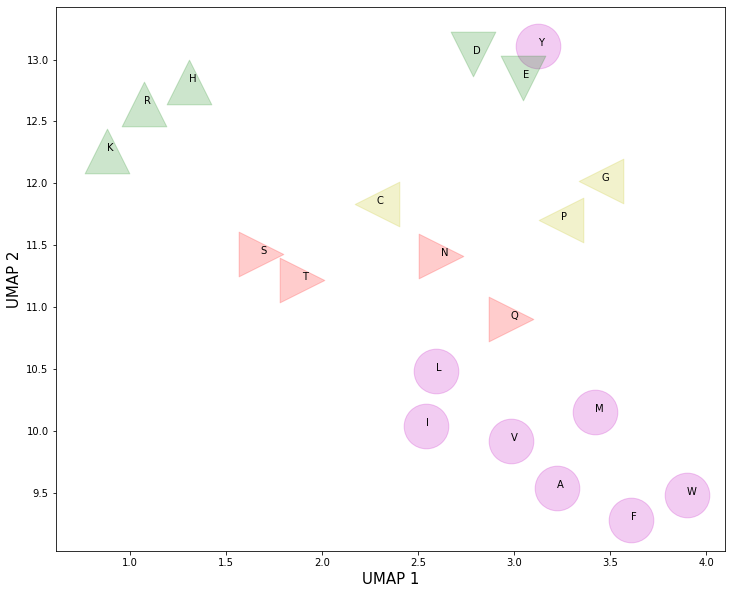

In [4]:
# query each amino acid from loaded word2vec model
aa_vec = []
for i in aa:
        aa_vec.append(word_vectors[i])
aa_vec = np.array(aa_vec)

# reduce dimenions of the 200 dimension vector
umap_embed = umap.UMAP(n_neighbors=3, min_dist=0.01, random_state=42).fit_transform(aa_vec)
df = pd.DataFrame([aa, aa_properties, aa_short, umap_embed[:,0], umap_embed[:,1]]).T

# plot reduced dimensions
fig, ax = plt.subplots(figsize=(12,10))
for k, row in df.iterrows():
    ax.scatter(float(row[3]), float(row[4]), marker=m_dict[row[1]], c=cmap_dict[row[1]], s=2000, alpha=0.2)

for i, txt in enumerate(df[2]):
    ax.annotate(txt, (umap_embed[i,0],umap_embed[i,1]))
    
plt.ylabel('UMAP 2', fontsize=15)
plt.xlabel('UMAP 1', fontsize=15)